# Derivative of Matrix
<hr>

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

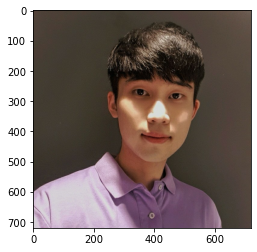

In [2]:
I = img.imread('selfie.jpg')     # 사진 로드

plt.imshow(I)     # 원본 사진 확인

## check the size of image

In [3]:
n_row = I.shape[0]     # shape[]로 row, col, channel 확인
n_col = I.shape[1]

print(I.shape) 

(720, 720, 3)


## convert the input image into gray scale if it is color

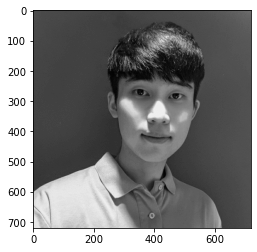

In [4]:
if I.shape[2] == 3: 
    
    red = I[:,:,0]     # 각 채널 픽셀 상응 값
    green = I[:,:,1]
    blue = I[:,:,2]
    
    I = (0.299*red + 0.587*green + 0.114*blue) / 3     # 가중치를 주며 rgb를 평균함
    
    plt.imshow(I, cmap='gray')     # 흑백 전환 

## normalize input image so that the range of image is $[0, 1]$

In [5]:
I = (I - np.min(I)) / (np.max(I) - np.min(I))     # min max normalization

## generate a matrix to compute the derivative in $x$-direction

In [6]:
Dx = np.zeros(n_row*n_col)     # np.zeros()로 n_row*n_col 크기 영행렬 생성
Dx = Dx.reshape(n_row, n_col)     # reshape()로 행렬 크기를 이미지 크기로 맞춤

for i in range(0, n_row):    
    for j in range(0, n_col):
        if i == j:
            Dx[i][j] = -1     # 행렬 대각선을 -1로 채움
        
for i in range(0, n_row-1):
    for j in range(0, n_col):
        if Dx[i][j] == -1:
            Dx[i+1][j] = 1     # -1 바로 아래를 1로 채움
            
Dx     # 이 행렬을 이미지에 적용시 x방향 미분 결과가 나옴

array([[-1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1., -1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1., -1.]])

## compute the derivative of $I$ with respect to $x$-direction

In [7]:
Ix = I.dot(Dx)

## generate a matrix to compute the derivative in $y$-direction

In [8]:
Dy = np.zeros(n_row*n_col)     # np.zeros()로 값이 0인 n_row*n_col 크기 행렬 생성
Dy = Dx.reshape(n_row, n_col)     # reshape()로 행렬 크기를 이미지 크기로 맞춤

for i in range(0, n_row):    
    for j in range(0, n_col):
        if i == j:
            Dy[i][j] = -1     # 행렬 대각선을 -1로 채움
        
for i in range(0, n_row):
    for j in range(0, n_col-1):
        if Dy[i][j] == -1:
            Dy[i][j+1] = 1     # -1 바로 오른쪽을 1로 채움
            Dx[i+1][j] = 0
            
Dy     # 이 행렬을 이미지에 적용시 y방향 미분 결과가 나옴

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0., -1.]])

## compute the derivative of $I$ with respect to $y$-direction

In [9]:
Iy = Dy.dot(I)

## compute $L_2^2$ of the gradient of $I$

In [10]:
norm_gradient = (Ix)**2 + (Iy)**2 

## define functions for the visualization

In [11]:
def plot_image(I):
    plt.figure(figsize=(10,10))
    plt.imshow(I, cmap='gray', norm=colors.LogNorm())     # 로그 스케일 적용
    plt.title('input image')
    plt.axis('off')
        
        
        
def plot_image_derivative_x(Ix):
    plt.figure(figsize=(10,10))
    plt.imshow(Ix, cmap='gray', norm=colors.LogNorm())     # 로그 스케일 적용
    plt.title('image derivative of x')
    plt.axis('off')

    
    
def plot_image_derivative_y(Iy):
    plt.figure(figsize=(10,10))
    plt.imshow(Iy, cmap='gray', norm=colors.LogNorm())     # 로그 스케일 적용
    plt.title('image derivative of y')
    plt.axis('off')

    
    
def plot_norm_gradient(norm_gradient):
    plt.figure(figsize=(10,10))
    plt.imshow(norm_gradient, cmap='gray', norm=colors.LogNorm())     # 로그 스케일 적용
    plt.title('norm gradient')
    plt.axis('off')

# Results
<hr>

## 01. plot the input image in gray scale

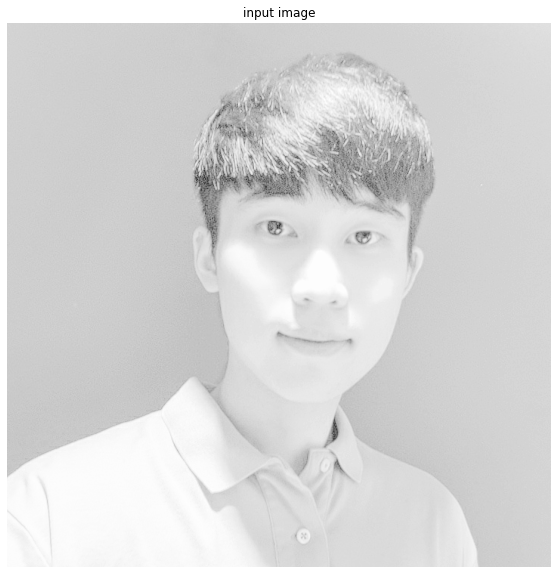

In [12]:
plot_image(I)

## 02. plot the derivative $I_x$ of input image in x-direction

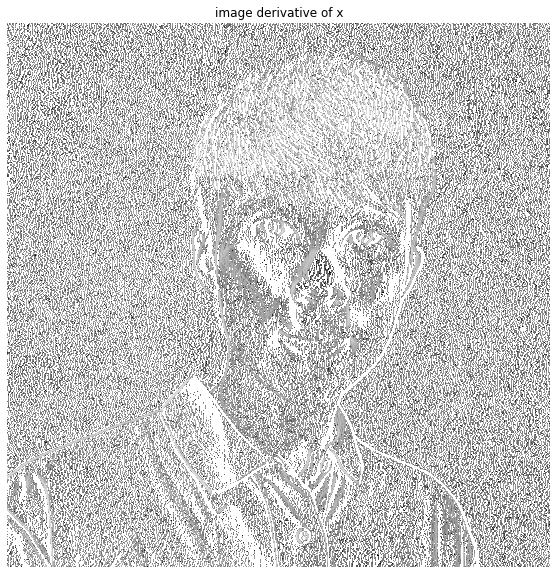

In [13]:
plot_image_derivative_x(Ix)

## 03. plot the derivative $I_y$ of input image in y-direction

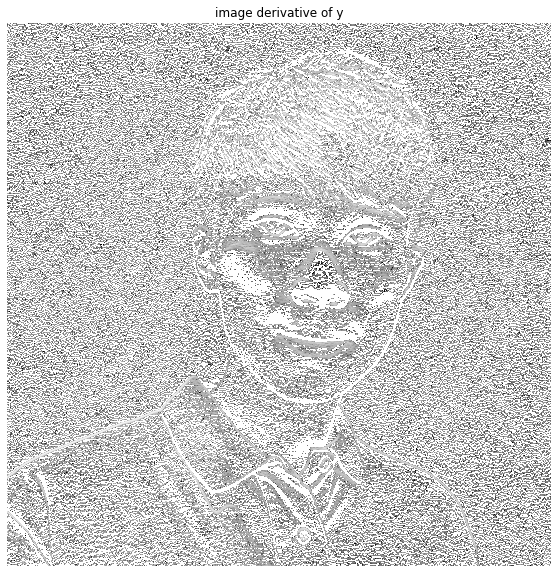

In [14]:
plot_image_derivative_y(Iy)

## 04. plot $L_2^2$ norm $I_x^2 + I_y^2$ of the gradient of input image

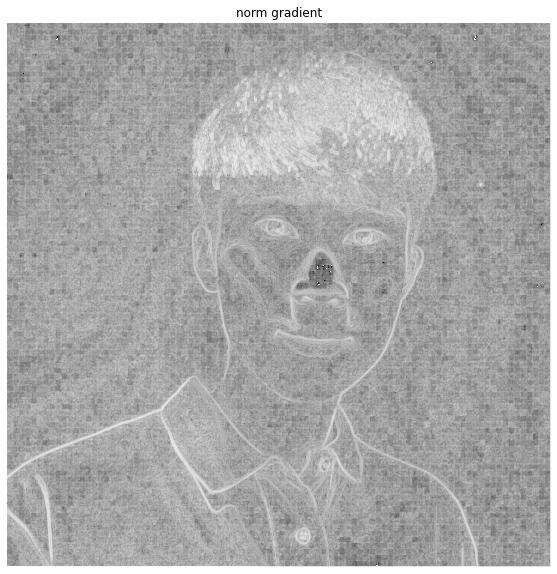

In [15]:
plot_norm_gradient(norm_gradient)